In [1]:
import sys
sys.path.insert(1, '..')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ProdSeqAnalysis_utils import *
# plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams["font.family"] = "Arial"
from matplotlib.ticker import StrMethodFormatter
from matplotlib.lines import Line2D
import random
import statistics
import matplotlib

In [2]:
S16_signalpath = "/path/to/S02316_output.PPIEnrichment.tsv"
S16_signals_unorder, S16_nms_unorder, S16_pairnms = ReadProdTSVFile(S16_signalpath)

reorder_idx = [
    15, 14, 7, 6,
    13, 12, 5, 4,
    11, 10, 3, 2,
    9, 8, 1, 0,
]
S16_nms = [S16_nms_unorder[x] for x in reorder_idx]
S16_signals_normed = []
for idx in reorder_idx:
    curr_row = S16_signals_unorder[idx]
    S16_signals_normed.append([x / curr_row[49] for x in curr_row])




washtimes_signalpath = "./path/to/HeLa_output.PPIEnrichment.tsv"
washtimes_signals_unorder, washtimes_nms_unorder, washtimes_pairnms = ReadProdTSVFile(washtimes_signalpath)

reorder_idx = [
    31, 27, 15, 11, 
    30, 26, 14, 10, 
    29, 25, 13, 9, 
    28, 24, 12, 8, 
    23, 19, 7, 3, 
    22, 18, 6, 2, 
    21, 17, 5, 1, 
    20, 16, 4, 0, 
]
washtimes_nms = [washtimes_nms_unorder[x] for x in reorder_idx]
washtimes_signals_normed = []
for idx in reorder_idx:
    curr_row = washtimes_signals_unorder[idx]
    washtimes_signals_normed.append([x / curr_row[49] for x in curr_row])

In [3]:
S16_nms

['S02316_3.3K27M_washout_B2T2',
 'S02316_3.3K27M_washout_B2T1',
 'S02316_3.3K27M_washout_B1T2',
 'S02316_3.3K27M_washout_B1T1',
 'S02316_3.3K27M_Dox_B2T2',
 'S02316_3.3K27M_Dox_B2T1',
 'S02316_3.3K27M_Dox_B1T2',
 'S02316_3.3K27M_Dox_B1T1',
 'S02316_3.1K27M_Washout_B2T2',
 'S02316_3.1K27M_Washout_B2T1',
 'S02316_3.1K27M_Washout_B1T2',
 'S02316_3.1K27M_Washout_B1T1',
 'S02316_3.1K27M_Dox_B2T2',
 'S02316_3.1K27M_Dox_B2T1',
 'S02316_3.1K27M_Dox_B1T2',
 'S02316_3.1K27M_Dox_B1T1']

In [4]:
S16_signals_normedavg = []
S16_nmsavg = []
s16avg_idx_list = [2 * x for x in range(int(len(S16_nms) / 2))]
for idx in s16avg_idx_list:
    curr_row = []
    for j in range(len(S16_signals_normed[idx])):
        curr_mean = (S16_signals_normed[idx][j] + S16_signals_normed[idx + 1][j]) / 2
        curr_row.append(curr_mean)
    S16_signals_normedavg.append(curr_row)
    S16_nmsavg.append(S16_nms[idx].split("T2")[0])

washtimes_signals_normedavg = []
washtimes_nmsavg = []
washavg_idx_list = [2 * x for x in range(int(len(washtimes_nms) / 2))]
for idx in washavg_idx_list:
    curr_row = []
    for j in range(len(washtimes_signals_normed[idx])):
        curr_mean = (washtimes_signals_normed[idx][j] + washtimes_signals_normed[idx + 1][j]) / 2
        curr_row.append(curr_mean)
    washtimes_signals_normedavg.append(curr_row)
    washtimes_nmsavg.append(washtimes_nms[idx].split("T2")[0])

In [5]:
washtimes_nmsavg

['HeLa_3.3K27M_96hwash_B2',
 'HeLa_3.3K27M_96hwash_B1',
 'HeLa_3.3K27M_24hwash_B2',
 'HeLa_3.3K27M_24hwash_B1',
 'HeLa_3.3K27M_6hwash_B2',
 'HeLa_3.3K27M_6hwash_B1',
 'HeLa_3.3K27M_0hwash_B2',
 'HeLa_3.3K27M_0hwash_B1',
 'HeLa_3.1K27M_96hwash_B2',
 'HeLa_3.1K27M_96hwash_B1',
 'HeLa_3.1K27M_24hwash_B2',
 'HeLa_3.1K27M_24hwash_B1',
 'HeLa_3.1K27M_6hwash_B2',
 'HeLa_3.1K27M_6hwash_B1',
 'HeLa_3.1K27M_0hwash_B2',
 'HeLa_3.1K27M_0hwash_B1']

In [6]:
plot_cmaps = [
    sns.color_palette("YlOrBr", as_cmap = True),
    sns.color_palette("Purples", as_cmap = True),
    sns.color_palette("Greens", as_cmap = True),
    sns.color_palette("Blues", as_cmap = True),
]

PPI_plot_groups = [
    ["EED&EZH2", "EED&SUZ12", "EZH2&SUZ12"],
    ["AEBP2&EED", "AEBP2&EZH2", "AEBP2&SUZ12", "H3K4me3&H3K27ac"],
    ["H3K27M&EED", "H3K27M&EZH2", "H3K27M&SUZ12", "H3K27M&H3K27ac"]
]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

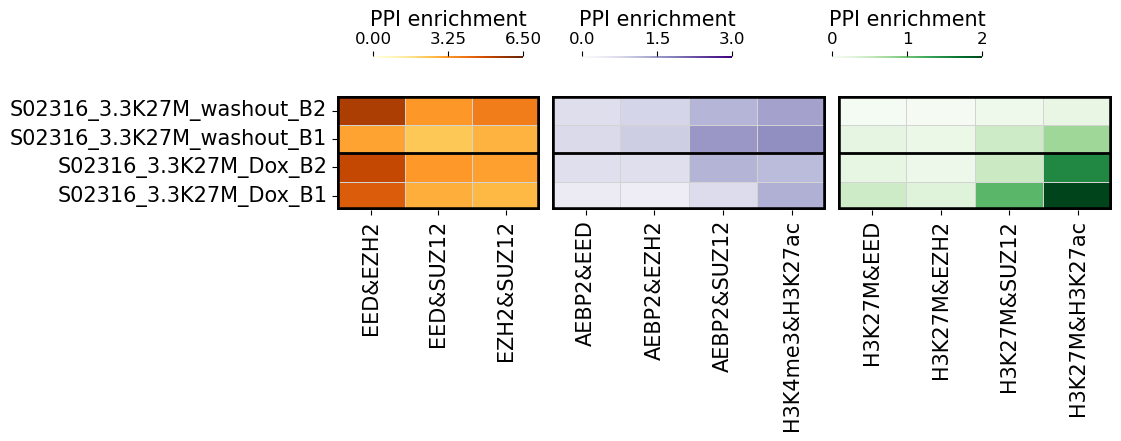

In [7]:
reorder_idx = [0, 1, 2, 3]
fig = GroupedPPIHeatmap([S16_signals_normedavg[x] for x in reorder_idx],
                        [S16_nmsavg[x] for x in reorder_idx],
                        S16_pairnms, bc_pair_groups = PPI_plot_groups,
                        plot_cmaps = plot_cmaps,
                        sample_group_sizes = [2, 2], plot_vmax = [6.5, 3, 2],
                        plot_vmin = [0, 0, 0],
                        cbar_ax_locs = [
                            [0.161, 0.87, 0.15, 0.01],
                            [0.37, 0.87, 0.15, 0.01],
                            [0.62, 0.87, 0.15, 0.01],
                            [0.845, 0.87, 0.05, 0.01],
                        ],
                        plot_size = (10, 2))
# fig.savefig("S02316_heatmap_bothalf.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

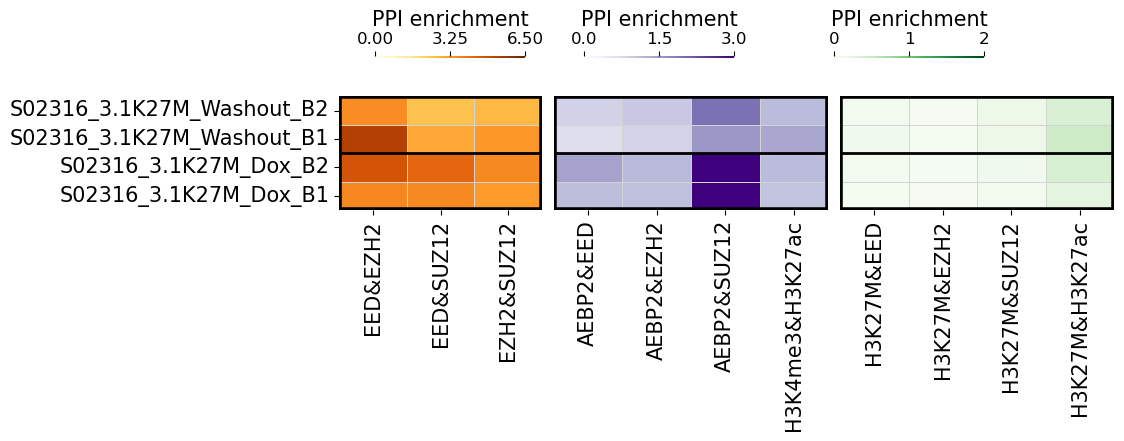

In [8]:
reorder_idx = [4, 5, 6, 7]
fig = GroupedPPIHeatmap([S16_signals_normedavg[x] for x in reorder_idx],
                        [S16_nmsavg[x] for x in reorder_idx],
                        S16_pairnms, bc_pair_groups = PPI_plot_groups,
                        plot_cmaps = plot_cmaps,
                        sample_group_sizes = [2, 2], plot_vmax = [6.5, 3, 2],
                        plot_vmin = [0, 0, 0],
                        cbar_ax_locs = [
                            [0.161, 0.87, 0.15, 0.01],
                            [0.37, 0.87, 0.15, 0.01],
                            [0.62, 0.87, 0.15, 0.01],
                            [0.845, 0.87, 0.05, 0.01],
                        ],
                        plot_size = (10, 2))
# fig.savefig("S02316_heatmap_tophalf.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

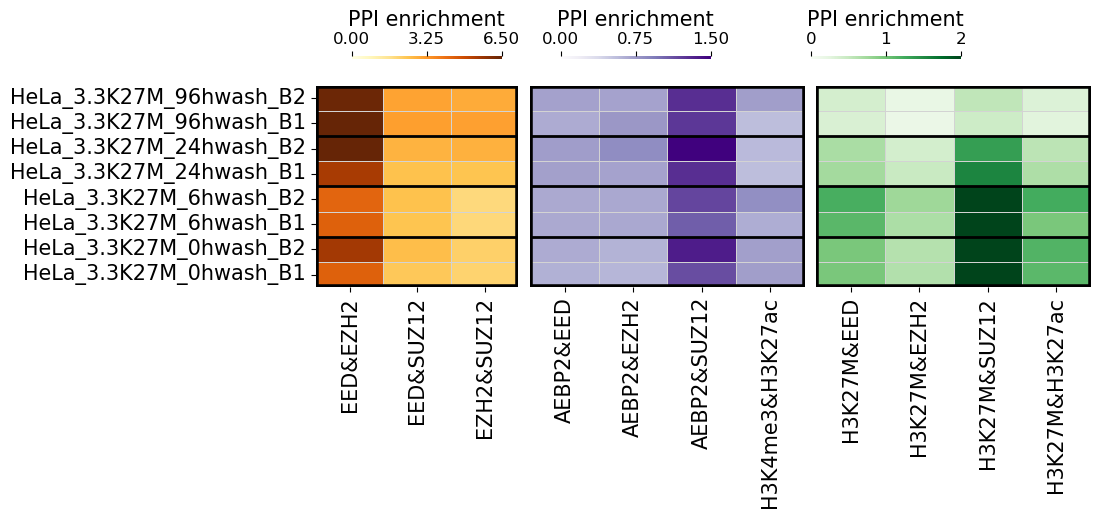

In [9]:
reorder_idx = [x for x in range(8)]
fig = GroupedPPIHeatmap([washtimes_signals_normedavg[x] for x in reorder_idx],
                        [washtimes_nmsavg[x] for x in reorder_idx], 
                        washtimes_pairnms, 
                        bc_pair_groups = PPI_plot_groups,
                        plot_cmaps = plot_cmaps,
                        sample_group_sizes = [2, 2, 2, 2], plot_vmax = [6.5, 1.5, 2],
                        plot_vmin = [0, 0, 0],
                        cbar_ax_locs = [
                            [0.161, 0.87, 0.15, 0.01],
                            [0.37, 0.87, 0.15, 0.01],
                            [0.62, 0.87, 0.15, 0.01],
                            [0.845, 0.87, 0.05, 0.01],
                        ],
                        plot_size = (10, 3))

# fig.savefig("washtimes_heatmap_bothalf.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

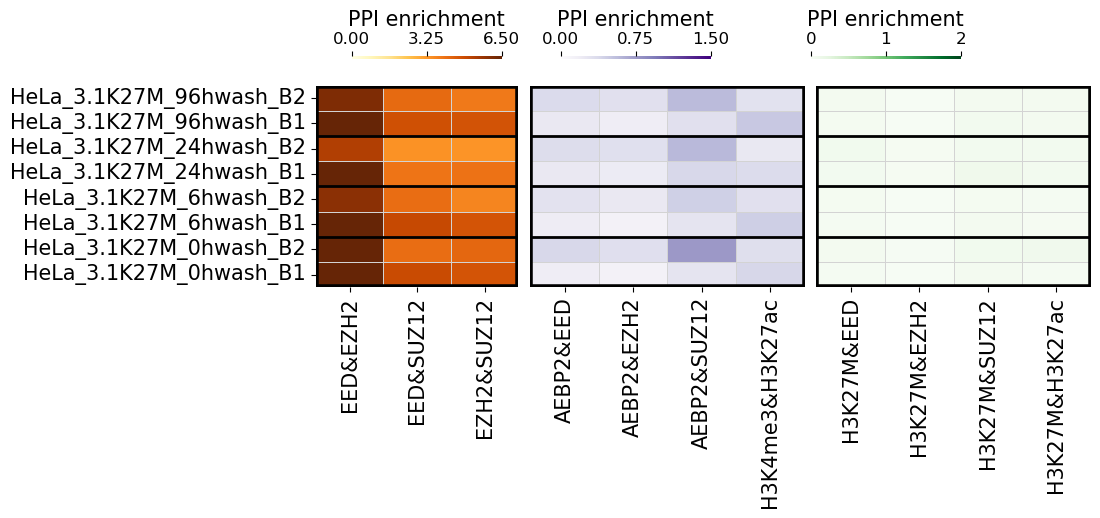

In [10]:
reorder_idx = [x + 8 for x in range(8)]
fig = GroupedPPIHeatmap([washtimes_signals_normedavg[x] for x in reorder_idx],
                        [washtimes_nmsavg[x] for x in reorder_idx], 
                        washtimes_pairnms, 
                        bc_pair_groups = PPI_plot_groups,
                        plot_cmaps = plot_cmaps,
                        sample_group_sizes = [2, 2, 2, 2], plot_vmax = [6.5, 1.5, 2],
                        plot_vmin = [0, 0, 0],
                        cbar_ax_locs = [
                            [0.161, 0.87, 0.15, 0.01],
                            [0.37, 0.87, 0.15, 0.01],
                            [0.62, 0.87, 0.15, 0.01],
                            [0.845, 0.87, 0.05, 0.01],
                        ],
                        plot_size = (10, 3))

# fig.savefig("washtimes_heatmap_tophalf.svg", dpi = 1200)

In [11]:
washtimes_nms

['HeLa_3.3K27M_96hwash_B2T2',
 'HeLa_3.3K27M_96hwash_B2T1',
 'HeLa_3.3K27M_96hwash_B1T2',
 'HeLa_3.3K27M_96hwash_B1T1',
 'HeLa_3.3K27M_24hwash_B2T2',
 'HeLa_3.3K27M_24hwash_B2T1',
 'HeLa_3.3K27M_24hwash_B1T2',
 'HeLa_3.3K27M_24hwash_B1T1',
 'HeLa_3.3K27M_6hwash_B2T2',
 'HeLa_3.3K27M_6hwash_B2T1',
 'HeLa_3.3K27M_6hwash_B1T2',
 'HeLa_3.3K27M_6hwash_B1T1',
 'HeLa_3.3K27M_0hwash_B2T2',
 'HeLa_3.3K27M_0hwash_B2T1',
 'HeLa_3.3K27M_0hwash_B1T2',
 'HeLa_3.3K27M_0hwash_B1T1',
 'HeLa_3.1K27M_96hwash_B2T2',
 'HeLa_3.1K27M_96hwash_B2T1',
 'HeLa_3.1K27M_96hwash_B1T2',
 'HeLa_3.1K27M_96hwash_B1T1',
 'HeLa_3.1K27M_24hwash_B2T2',
 'HeLa_3.1K27M_24hwash_B2T1',
 'HeLa_3.1K27M_24hwash_B1T2',
 'HeLa_3.1K27M_24hwash_B1T1',
 'HeLa_3.1K27M_6hwash_B2T2',
 'HeLa_3.1K27M_6hwash_B2T1',
 'HeLa_3.1K27M_6hwash_B1T2',
 'HeLa_3.1K27M_6hwash_B1T1',
 'HeLa_3.1K27M_0hwash_B2T2',
 'HeLa_3.1K27M_0hwash_B2T1',
 'HeLa_3.1K27M_0hwash_B1T2',
 'HeLa_3.1K27M_0hwash_B1T1']

[Text(0, 0, '0'),
 Text(6, 0, '6'),
 Text(24, 0, '24'),
 Text(96, 0, '96'),
 Text(0, 0, '0'),
 Text(6, 0, '6'),
 Text(24, 0, '24'),
 Text(96, 0, '96'),
 Text(0, 0, '0'),
 Text(6, 0, '6'),
 Text(24, 0, '24'),
 Text(96, 0, '96'),
 Text(0, 0, '0'),
 Text(6, 0, '6'),
 Text(24, 0, '24'),
 Text(96, 0, '96')]

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

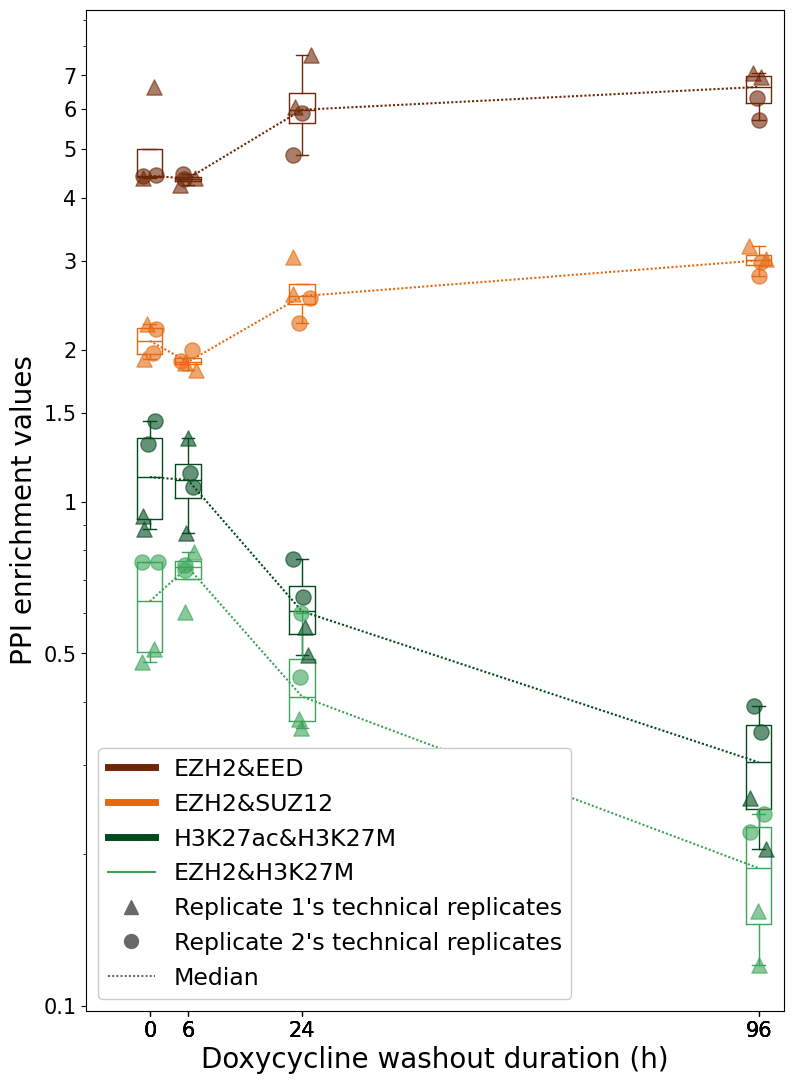

In [12]:

cmap_0 = plt.get_cmap('YlOrBr')
cmap_1 = plt.get_cmap('Greens')
cmap_2 = plt.get_cmap('Greens')
cmap_vec = [cmap_0, cmap_0, cmap_1, cmap_2]
color_cmap_number = [0.98, 0.65, 0.98, 0.65]
box_PPI_pairs = ["EZH2&EED", "EZH2&SUZ12", "H3K27ac&H3K27M", "EZH2&H3K27M"]

washtimes_box_data = [[] for x in box_PPI_pairs] #0h, 6h, 24h, 96h

for PPI_idx in range(len(box_PPI_pairs)):
    PPI = box_PPI_pairs[PPI_idx]
    col_idx = washtimes_pairnms.index(PPI)

    for idx in [3, 2, 1, 0]:
        curr_vec = []
        curr_vec.append(washtimes_signals_normed[4 * idx][col_idx])
        curr_vec.append(washtimes_signals_normed[4 * idx + 1][col_idx])
        curr_vec.append(washtimes_signals_normed[4 * idx + 2][col_idx])
        curr_vec.append(washtimes_signals_normed[4 * idx + 3][col_idx])
        washtimes_box_data[PPI_idx].append(curr_vec)


# Plot
x_times = [0, 6, 24, 96]
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig, ax = plt.subplots(figsize = (9, 13))
ax.set_xlim(-10, 100)
median_ls = (0, (1, 1, 1, 1))
for PPI_idx in range(len(box_PPI_pairs)):
    curr_cmap = (cmap_vec[PPI_idx])
    curr_color = curr_cmap(color_cmap_number[PPI_idx])
    bpl = ax.boxplot(washtimes_box_data[PPI_idx], positions = x_times, sym='', widths=4, boxprops={'linewidth': 1},
                                  medianprops={'linewidth': 1},
                                  whiskerprops={'linewidth': 1},
                                  capprops={'linewidth': 1})
    ax.plot([], c=curr_color, label=box_PPI_pairs[PPI_idx])
    set_box_color(bpl, curr_color)
    ax.plot(x_times, [statistics.median(x) for x in washtimes_box_data[PPI_idx]], color = curr_color,
           ls = median_ls)
    for x_idx in range(4):
        for dot_idx in [0, 2]:
            ax.scatter(x_times[x_idx] + (random.random() * 3) - 1.5, washtimes_box_data[PPI_idx][x_idx][dot_idx],
                      color = curr_color, alpha = 0.6, s = 120, zorder=10, marker = "^")
        for dot_idx in [1, 3]:
            ax.scatter(x_times[x_idx] + (random.random() * 3) - 1.5, washtimes_box_data[PPI_idx][x_idx][dot_idx],
                      color = curr_color, alpha = 0.6, s = 120, zorder=10, marker = "o")

handles, labels = ax.get_legend_handles_labels()
add_point = Line2D([0], [0], label="Replicate 1's technical replicates", marker='^', markersize=10, 
               markerfacecolor='dimgrey', linestyle='', markeredgecolor='dimgrey')
add_point_2 = Line2D([0], [0], label="Replicate 2's technical replicates", marker='o', markersize=10, 
               markerfacecolor='dimgrey', linestyle='', markeredgecolor='dimgrey')
add_point_3 = Line2D([0], [1], label="Median",
               color='dimgrey', linestyle=median_ls, markeredgecolor='dimgrey')
handles.extend([add_point, add_point_2, add_point_3])
plt_legend = ax.legend(handles=handles, loc='best', framealpha=1.0, fontsize = 17)
for line in (plt_legend.get_lines())[0:3]:
    line.set_linewidth(5.0)
ax.set_xlabel("Doxycycline washout duration (h)", fontsize = 20)
ax.set_ylabel("PPI enrichment values", fontsize = 20)
ax.set_yscale('log')
y_ticks_list = [0.1, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7]
ax.set_yticks(y_ticks_list)
ax.set_yticklabels([str(x) for x in y_ticks_list], fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)

# fig.savefig("washtimes_boxplot.svg", dpi = 1200)